# Gradient Descent for Optimization

In [2]:
# Matrix computations
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
# Plotting
from matplotlib.pyplot import *

# Change size of figures
fig_size = [9,7]
rcParams["figure.figsize"] = fig_size

## Minimizing multiple variable function

Let us consider the following straight forward bivariate function $$f(x,y) = x^2 + y^2 + 1.$$ Since this a function of two variables, we have have the following partial derivatives $$\frac{df(x)}{dx} = f_{x} = 2x \text{ and } \frac{df(y)}{dy} = f_{y} = 2y.$$ Note that its easy to argue that the global minimum of $f(x,y)$ is (0,0) since $f(0,0) = 1$ and $f(x,y) \ge 1.$


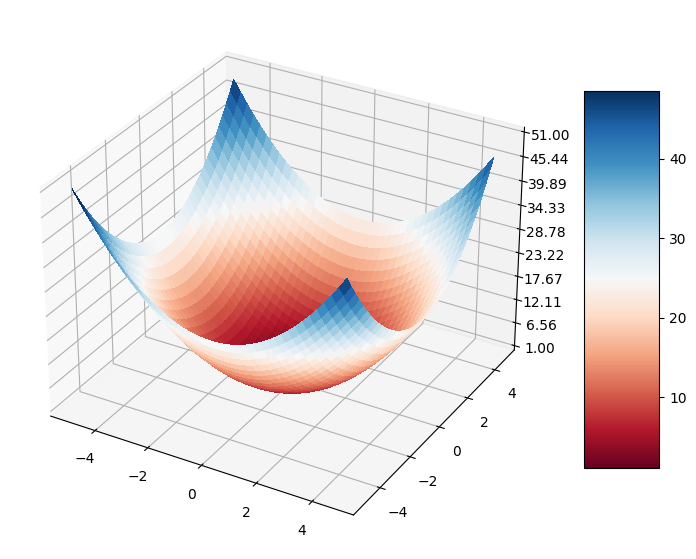

In [3]:
# Plotting in 3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

# f(x,y) = x^2 + y^2 + 1
def f(x,y):
    return x**2 + y**2 + 1

# (X,Y) grid on [-5,5]
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
X, Y = meshgrid(x, y)


# z = x^2 + y^2
Z = f(X,Y)

# Plot (X,Y) in 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
show()

### Finding global minimum using gradient descent

For this example the gradient descent algorithm is simplified to

$$
\begin{bmatrix}
    x^{t+1} \\
    y^{t+1}
\end{bmatrix}
=
\begin{bmatrix}
    x^{t} \\
    y^{t}
\end{bmatrix}
-
\lambda
\begin{bmatrix}
    2x^{t} \\
    2y^{t} \\
\end{bmatrix},
$$

where $t$ is the gradient descent iteration.

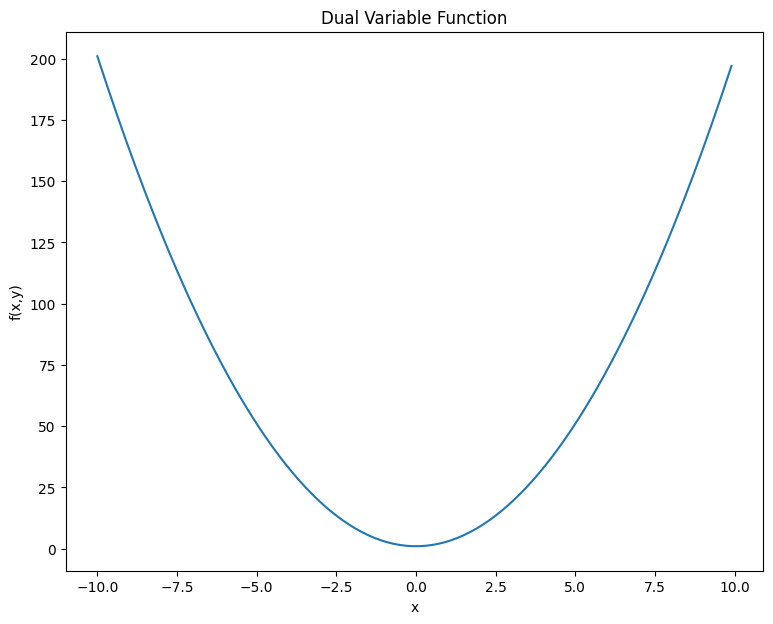

In [4]:
# Your code here
def f(x,y):
    return x**2 + y**2 + 1

# Second arguments allows for seperate points to be ploted on f(x)
def plotf(x,y,xdots,ydots, label):

    # Compute z-values
    z=f(x,y)

    # Plot (x,y, f(x,y))
    plot(x,z)
    xlabel("x")
    ylabel("f(x,y)")
    title(label)

    # Plot points on f(x)
    plot(xdots, f(xdots,ydots), 'bo')
    show()
# Plot f(x) from [-10,10]
x = np.arange(-10, 10, 0.1)
y = np.arange(-10,10,0.1)
plotf(x,y, np.array([]),np.array([]), "Dual Variable Function")

In [5]:
def derivative(x,y):
  return [2*x,2*y]

In [6]:
# Gradient Descent
def grad_descent(derivative,x_prev,y_prev,learning_rate):

  # Deciding when to stop the algorithm
  epsilon = 0.001

  # Iteration number
  grad_iter = 1

  # Gradient descent update step
  x_next = x_prev - learning_rate*derivative(x_prev,y_prev)[0]
  y_next = y_prev-learning_rate*derivative(x_prev,y_prev)[1]
  # Update the sequence where we store all the x_next
  sequence = np.array([[x_next,y_next]])

  # Start my iteration
  while abs(x_next - x_prev) > epsilon or abs(y_next - y_prev) > epsilon:

    # Setting x_prev,y_prev to x_next and y_next
    x_prev = x_next
    y_prev=y_next

    # Updating x_next,y_next
    x_next = x_prev - learning_rate*derivative(x_prev,y_prev)[0]
    y_next = y_prev - learning_rate*derivative(x_prev,y_prev)[1]

    # Update sequence
    sequence = np.append(sequence,[[x_next,y_next]],axis=0)

    # Update iteration
    grad_iter = grad_iter + 1


  return (x_next,y_next),sequence,grad_iter

In [16]:
# Output vector (min x,y-value, ((x_1,y_1),..,(x_T,y_T)) from gradient descent

grad_output = grad_descent(derivative,5,5,0.1)

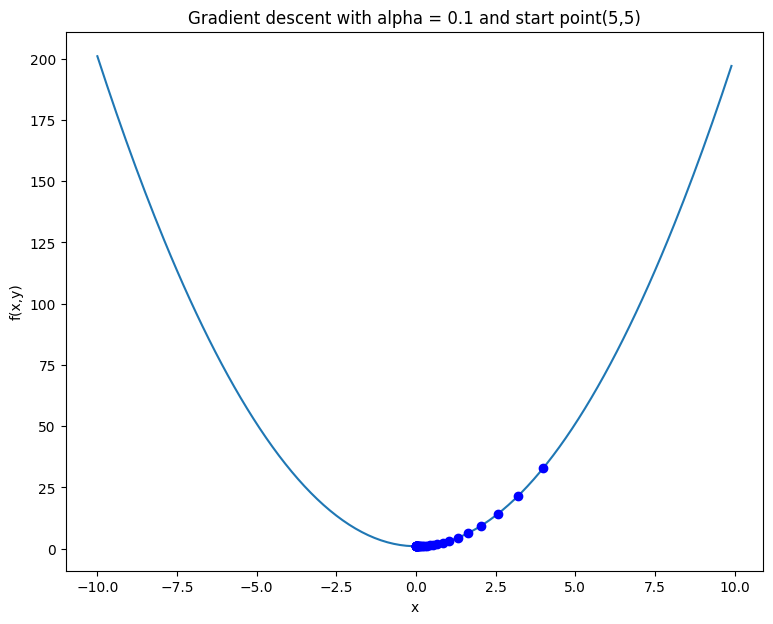

In [13]:
#plot the function and its gradient descent path

x=arange(-10,10,0.1)
y=arange(-10,10,0.1)
plotf(x,y,grad_output[1][:,0],grad_output[1][:,1], "Gradient descent with alpha = 0.1 and start point(5,5)")

In [14]:
grad_output[1]

array([[4.00000000e+00, 4.00000000e+00],
       [3.20000000e+00, 3.20000000e+00],
       [2.56000000e+00, 2.56000000e+00],
       [2.04800000e+00, 2.04800000e+00],
       [1.63840000e+00, 1.63840000e+00],
       [1.31072000e+00, 1.31072000e+00],
       [1.04857600e+00, 1.04857600e+00],
       [8.38860800e-01, 8.38860800e-01],
       [6.71088640e-01, 6.71088640e-01],
       [5.36870912e-01, 5.36870912e-01],
       [4.29496730e-01, 4.29496730e-01],
       [3.43597384e-01, 3.43597384e-01],
       [2.74877907e-01, 2.74877907e-01],
       [2.19902326e-01, 2.19902326e-01],
       [1.75921860e-01, 1.75921860e-01],
       [1.40737488e-01, 1.40737488e-01],
       [1.12589991e-01, 1.12589991e-01],
       [9.00719925e-02, 9.00719925e-02],
       [7.20575940e-02, 7.20575940e-02],
       [5.76460752e-02, 5.76460752e-02],
       [4.61168602e-02, 4.61168602e-02],
       [3.68934881e-02, 3.68934881e-02],
       [2.95147905e-02, 2.95147905e-02],
       [2.36118324e-02, 2.36118324e-02],
       [1.888946

In [15]:
grad_output[2]

32

##Using a small learning rate

In [17]:

grad_output = grad_descent(derivative,5,5,0.02)

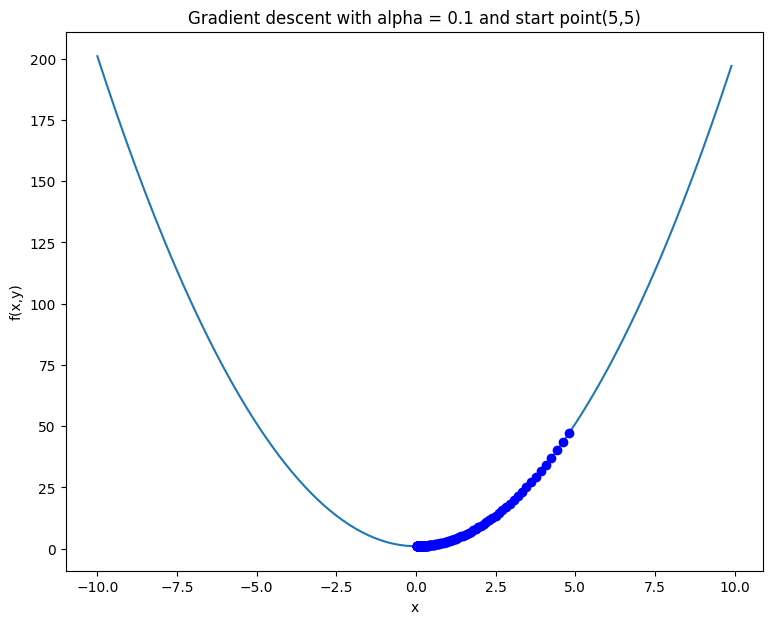

In [18]:
#plot the function and its gradient descent path

x=arange(-10,10,0.1)
y=arange(-10,10,0.1)
plotf(x,y,grad_output[1][:,0],grad_output[1][:,1], "Gradient descent with alpha = 0.1 and start point(5,5)")

In [19]:
grad_output[1]

array([[4.8       , 4.8       ],
       [4.608     , 4.608     ],
       [4.42368   , 4.42368   ],
       [4.2467328 , 4.2467328 ],
       [4.07686349, 4.07686349],
       [3.91378895, 3.91378895],
       [3.75723739, 3.75723739],
       [3.60694789, 3.60694789],
       [3.46266998, 3.46266998],
       [3.32416318, 3.32416318],
       [3.19119665, 3.19119665],
       [3.06354879, 3.06354879],
       [2.94100684, 2.94100684],
       [2.82336656, 2.82336656],
       [2.7104319 , 2.7104319 ],
       [2.60201462, 2.60201462],
       [2.49793404, 2.49793404],
       [2.39801668, 2.39801668],
       [2.30209601, 2.30209601],
       [2.21001217, 2.21001217],
       [2.12161168, 2.12161168],
       [2.03674722, 2.03674722],
       [1.95527733, 1.95527733],
       [1.87706623, 1.87706623],
       [1.80198358, 1.80198358],
       [1.72990424, 1.72990424],
       [1.66070807, 1.66070807],
       [1.59427975, 1.59427975],
       [1.53050856, 1.53050856],
       [1.46928822, 1.46928822],
       [1.

In [20]:
grad_output[2]

131

##Using a large learning rate

In [29]:
grad_output = grad_descent(derivative,5,5,0.9)

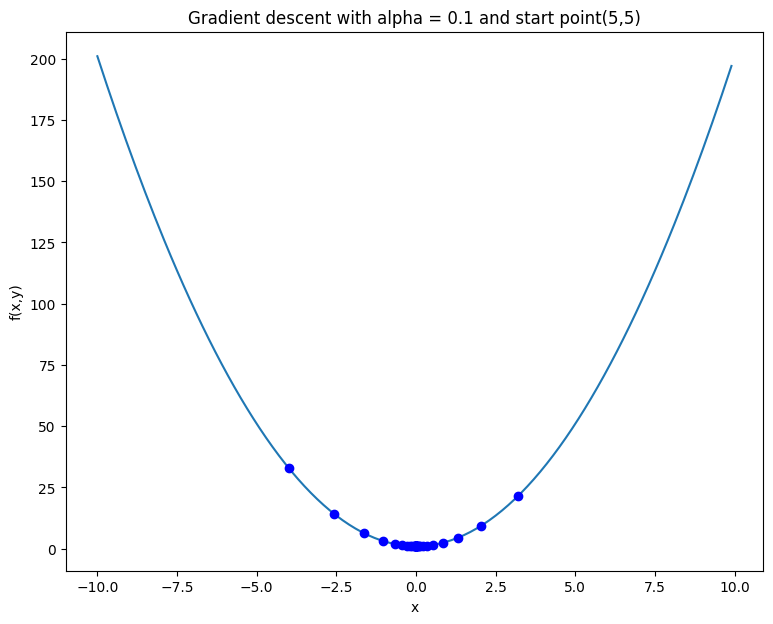

In [30]:
#plot the function and its gradient descent path

x=arange(-10,10,0.1)
y=arange(-10,10,0.1)
plotf(x,y,grad_output[1][:,0],grad_output[1][:,1], "Gradient descent with alpha = 0.1 and start point(5,5)")

In [31]:
grad_output[1]

array([[-4.00000000e+00, -4.00000000e+00],
       [ 3.20000000e+00,  3.20000000e+00],
       [-2.56000000e+00, -2.56000000e+00],
       [ 2.04800000e+00,  2.04800000e+00],
       [-1.63840000e+00, -1.63840000e+00],
       [ 1.31072000e+00,  1.31072000e+00],
       [-1.04857600e+00, -1.04857600e+00],
       [ 8.38860800e-01,  8.38860800e-01],
       [-6.71088640e-01, -6.71088640e-01],
       [ 5.36870912e-01,  5.36870912e-01],
       [-4.29496730e-01, -4.29496730e-01],
       [ 3.43597384e-01,  3.43597384e-01],
       [-2.74877907e-01, -2.74877907e-01],
       [ 2.19902326e-01,  2.19902326e-01],
       [-1.75921860e-01, -1.75921860e-01],
       [ 1.40737488e-01,  1.40737488e-01],
       [-1.12589991e-01, -1.12589991e-01],
       [ 9.00719925e-02,  9.00719925e-02],
       [-7.20575940e-02, -7.20575940e-02],
       [ 5.76460752e-02,  5.76460752e-02],
       [-4.61168602e-02, -4.61168602e-02],
       [ 3.68934881e-02,  3.68934881e-02],
       [-2.95147905e-02, -2.95147905e-02],
       [ 2.

In [32]:
grad_output[2]

42

## Experimenting with 0.5 LL

In [34]:
grad_output = grad_descent(derivative,5,5,0.5)

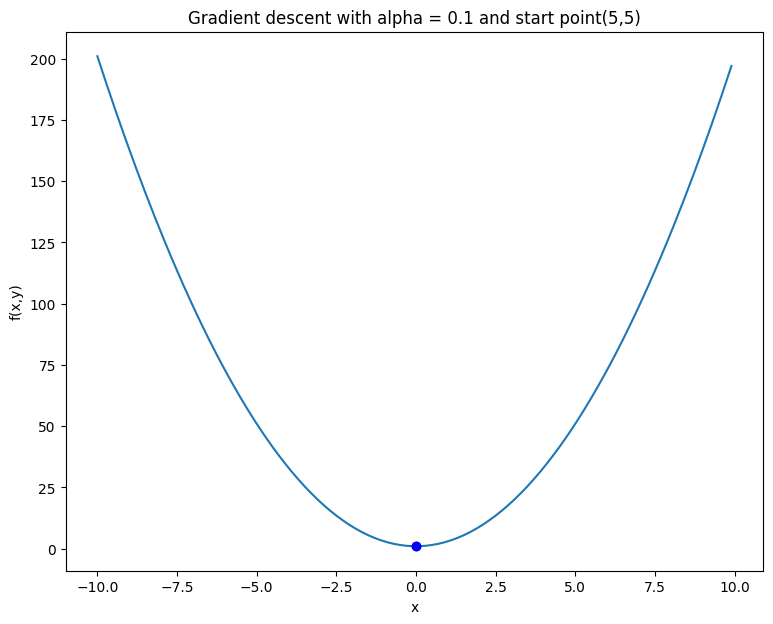

In [35]:
#plot the function and its gradient descent path

x=arange(-10,10,0.1)
y=arange(-10,10,0.1)
plotf(x,y,grad_output[1][:,0],grad_output[1][:,1], "Gradient descent with alpha = 0.1 and start point(5,5)")

In [36]:
grad_output[1]

array([[0., 0.],
       [0., 0.]])

In [37]:
grad_output[2]

2